In [2]:
# boilerplate code
from __future__ import print_function
import os
from io import BytesIO
import numpy as np
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML

import tensorflow as tf

import cv2
import scipy.ndimage as nd

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Import video and split into frames

In [110]:
vidcap = cv2.VideoCapture('Kaleidoscope - 640x360.mp4')
success,image = vidcap.read()

count = 0
new_count = 0
!mkdir vid_frames
!mkdir used_frames
while success:
    cv2.imwrite("vid_frames/frame%d.jpg" % count, image)     # save frame as JPEG file
    if (count >= 450 and count <= 900):
        if (count >= 450 and count <= 495):
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    for k in range(image.shape[2]):
                        image[i,j,k] = int(image[i,j,k] * ((count-450)/45))
            cv2.imwrite("used_frames/frame%d.jpg" % new_count, image)
            print(count-450)
        elif (count >= 855 and count <= 900):
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    for k in range(image.shape[2]):
                        image[i,j,k] = int(image[i,j,k] * (1 - ((count-855)/45)))
            cv2.imwrite("used_frames2/frame%d.jpg" % new_count, image)
            print(count-855)
        else:
            cv2.imwrite("used_frames2/frame%d.jpg" % new_count, image)
            print("Rest")
        new_count += 1
    success,image = vidcap.read()
    if count == 0:
        print(image.shape)
    #print('Read a new frame: ', success)
    #print(count)
    count += 1
    

mkdir: cannot create directory ‘vid_frames’: File exists
mkdir: cannot create directory ‘used_frames2’: File exists
(360, 640, 3)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Rest
Re

Make video out of selected frames

In [112]:
!ffmpeg -r 15 -i used_frames/frame%d.jpg -s 640x360 new_kaleidoscope15.mp4

ffmpeg version 3.4.4-0ubuntu0.18.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

Use frames of video to make a version that zooms in

In [113]:
!mkdir zoomed_frames2

Make zoomed in frames

In [114]:
frame_i = 0
total_frames = 450
for i in range(total_frames):
    print("Frame:", i)
    frame = PIL.Image.open("used_frames/frame%d.jpg"%frame_i)
    frame = np.float32(frame)
    h, w = frame.shape[:2]
    #Zoom in
    if (i > total_frames//4 and i <= total_frames//2):
        s = 1 - ((i-(total_frames//4))/(total_frames//2)) 
        print(s)
        frame = nd.affine_transform(frame, [s,s,1], [h*(1-s)/2, w*(1-s)/2, 0], order = 1)
    elif (i > total_frames//2 and i <= 3*total_frames//4):
        s = .5
        print(s)
        frame = nd.affine_transform(frame, [s,s,1], [h*(1-s)/2, w*(1-s)/2, 0], order = 1)
    elif (i >= 3*total_frames//4 and i <= total_frames):
        s = ((i-(3*total_frames//4))/(total_frames//2)) + .5
        print(s)
        frame = nd.affine_transform(frame, [s,s,1], [h*(1-s)/2, w*(1-s)/2, 0], order = 1)
    
    PIL.Image.fromarray(np.uint8(np.clip(frame/255.0, 0, 1)*255)).save("zoomed_frames/frame%d.jpg"%frame_i)
    frame_i += 1


Frame: 0
Frame: 1
Frame: 2
Frame: 3
Frame: 4
Frame: 5
Frame: 6
Frame: 7
Frame: 8
Frame: 9
Frame: 10
Frame: 11
Frame: 12
Frame: 13
Frame: 14
Frame: 15
Frame: 16
Frame: 17
Frame: 18
Frame: 19
Frame: 20
Frame: 21
Frame: 22
Frame: 23
Frame: 24
Frame: 25
Frame: 26
Frame: 27
Frame: 28
Frame: 29
Frame: 30
Frame: 31
Frame: 32
Frame: 33
Frame: 34
Frame: 35
Frame: 36
Frame: 37
Frame: 38
Frame: 39
Frame: 40
Frame: 41
Frame: 42
Frame: 43
Frame: 44
Frame: 45
Frame: 46
Frame: 47
Frame: 48
Frame: 49
Frame: 50
Frame: 51
Frame: 52
Frame: 53
Frame: 54
Frame: 55
Frame: 56
Frame: 57
Frame: 58
Frame: 59
Frame: 60
Frame: 61
Frame: 62
Frame: 63
Frame: 64
Frame: 65
Frame: 66
Frame: 67
Frame: 68
Frame: 69
Frame: 70
Frame: 71
Frame: 72
Frame: 73
Frame: 74
Frame: 75
Frame: 76
Frame: 77
Frame: 78
Frame: 79
Frame: 80
Frame: 81
Frame: 82
Frame: 83
Frame: 84
Frame: 85
Frame: 86
Frame: 87
Frame: 88
Frame: 89
Frame: 90
Frame: 91
Frame: 92
Frame: 93
Frame: 94
Frame: 95
Frame: 96
Frame: 97
Frame: 98
Frame: 99
Frame: 100

Frame: 415
0.8466666666666667
Frame: 416
0.8511111111111112
Frame: 417
0.8555555555555556
Frame: 418
0.86
Frame: 419
0.8644444444444445
Frame: 420
0.8688888888888888
Frame: 421
0.8733333333333333
Frame: 422
0.8777777777777778
Frame: 423
0.8822222222222222
Frame: 424
0.8866666666666667
Frame: 425
0.8911111111111112
Frame: 426
0.8955555555555555
Frame: 427
0.9
Frame: 428
0.9044444444444444
Frame: 429
0.9088888888888889
Frame: 430
0.9133333333333333
Frame: 431
0.9177777777777778
Frame: 432
0.9222222222222223
Frame: 433
0.9266666666666667
Frame: 434
0.9311111111111111
Frame: 435
0.9355555555555555
Frame: 436
0.94
Frame: 437
0.9444444444444444
Frame: 438
0.9488888888888889
Frame: 439
0.9533333333333334
Frame: 440
0.9577777777777778
Frame: 441
0.9622222222222222
Frame: 442
0.9666666666666667
Frame: 443
0.971111111111111
Frame: 444
0.9755555555555555
Frame: 445
0.98
Frame: 446
0.9844444444444445
Frame: 447
0.9888888888888889
Frame: 448
0.9933333333333334
Frame: 449
0.9977777777777778


Turn zoomed in frames into a video

In [14]:
!ffmpeg -r 20 -i zoomed_frames/frame%d.jpg -s 960x540 zoom_kaleidoscope20.mp4

ffmpeg version 3.4.4-0ubuntu0.18.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

## Loading model graph

In [3]:
!wget -nc https://storage.googleapis.com/download.tensorflow.org/models/inception5h.zip && unzip -n inception5h.zip

File ‘inception5h.zip’ already there; not retrieving.

Archive:  inception5h.zip


In [3]:
model_fn = 'tensorflow_inception_graph.pb'

# creating TensorFlow session and loading the model
graph = tf.Graph()
sess = tf.InteractiveSession(graph=graph)
with tf.gfile.FastGFile(model_fn, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
t_input = tf.placeholder(np.float32, name='input') # define the input tensor
imagenet_mean = 117.0
t_preprocessed = tf.expand_dims(t_input-imagenet_mean, 0)
tf.import_graph_def(graph_def, {'input':t_preprocessed})

Instructions for updating:
Use tf.gfile.GFile.


In [4]:
layers = [op.name for op in graph.get_operations() if op.type=='Conv2D' and 'import/' in op.name]
feature_nums = [int(graph.get_tensor_by_name(name+':0').get_shape()[-1]) for name in layers]

print('Number of layers', len(layers))
print('Total number of feature channels:', sum(feature_nums))


# Helper functions for TF Graph visualization

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = tf.compat.as_bytes("<stripped %d bytes>"%size)
    return strip_def
  
def rename_nodes(graph_def, rename_func):
    res_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = res_def.node.add() 
        n.MergeFrom(n0)
        n.name = rename_func(n.name)
        for i, s in enumerate(n.input):
            n.input[i] = rename_func(s) if s[0]!='^' else '^'+rename_func(s[1:])
    return res_def
  
def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
  
    iframe = """
        <iframe seamless style="width:800px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# Visualizing the network graph. Be sure expand the "mixed" nodes to see their 
# internal structure. We are going to visualize "Conv2D" nodes.
tmp_def = rename_nodes(graph_def, lambda s:"/".join(s.split('_',1)))
show_graph(tmp_def)

Number of layers 59
Total number of feature channels: 7548


-19.685318 -35.483215 14.6389675 78.032196 154.54218 213.30916 278.8556 328.26108 386.97656 430.39273 468.29254 513.95337 551.1692 586.9264 619.84247 651.2624 673.09406 704.5953 725.78436 749.5537 

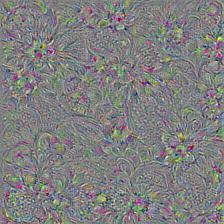

In [5]:
# Picking some internal layer. Note that we use outputs before applying the ReLU nonlinearity
# to have non-zero gradients for features with negative initial activations.
layer = 'mixed4d_3x3_bottleneck_pre_relu'
channel = 139 # picking some feature channel to visualize

# start with a gray image with a little noise
img_noise = np.random.uniform(size=(224,224,3)) + 100.0

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1)*255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
def visstd(a, s=0.1):
    '''Normalize the image range for visualization'''
    return (a-a.mean())/max(a.std(), 1e-4)*s + 0.5

def T(layer):
    '''Helper for getting layer output tensor'''
    return graph.get_tensor_by_name("import/%s:0"%layer)

def render_naive(t_obj, img0=img_noise, iter_n=20, step=1.0):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!
    
    img = img0.copy()
    for i in range(iter_n):
        g, score = sess.run([t_grad, t_score], {t_input:img})
        # normalizing the gradient, so the same step size should work 
        g /= g.std()+1e-8         # for different layers and networks
        img += g*step
        print(score, end = ' ')
#     clear_output()
    showarray(visstd(img))

render_naive(T(layer)[:,:,:,channel])

In [6]:
def tffunc(*argtypes):
    '''Helper that transforms TF-graph generating function into a regular one.
    See "resize" function below.
    '''
    placeholders = list(map(tf.placeholder, argtypes))
    def wrap(f):
        out = f(*placeholders)
        def wrapper(*args, **kw):
            return out.eval(dict(zip(placeholders, args)), session=kw.get('session'))
        return wrapper
    return wrap

# Helper function that uses TF to resize an image
def resize(img, size):
    img = tf.expand_dims(img, 0)
    return tf.image.resize_bilinear(img, size)[0,:,:,:]
resize = tffunc(np.float32, np.int32)(resize)


def calc_grad_tiled(img, t_grad, tile_size=512):
    '''Compute the value of tensor t_grad over the image in a tiled way.
    Random shifts are applied to the image to blur tile boundaries over 
    multiple iterations.'''
    sz = tile_size
    h, w = img.shape[:2]
    sx, sy = np.random.randint(sz, size=2)
    img_shift = np.roll(np.roll(img, sx, 1), sy, 0)
    grad = np.zeros_like(img)
    for y in range(0, max(h-sz//2, sz),sz):
        for x in range(0, max(w-sz//2, sz),sz):
            sub = img_shift[y:y+sz,x:x+sz]
            g = sess.run(t_grad, {t_input:sub})
            grad[y:y+sz,x:x+sz] = g
    return np.roll(np.roll(grad, -sx, 1), -sy, 0)

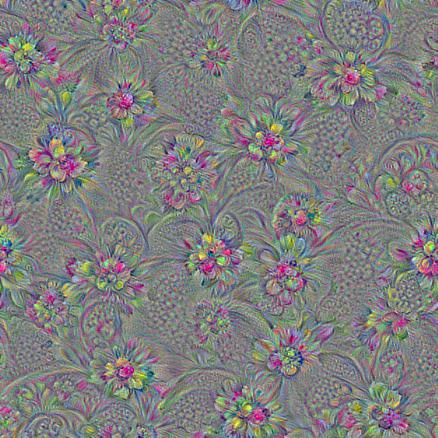

In [7]:
def render_multiscale(t_obj, img0=img_noise, iter_n=10, step=1.0, octave_n=3, octave_scale=1.4):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!
    
    img = img0.copy()
    for octave in range(octave_n):
        if octave>0:
            hw = np.float32(img.shape[:2])*octave_scale
            img = resize(img, np.int32(hw))
        for i in range(iter_n):
            g = calc_grad_tiled(img, t_grad)
            # normalizing the gradient, so the same step size should work 
            g /= g.std()+1e-8         # for different layers and networks
            img += g*step
            print('.', end = ' ')
        clear_output()
        showarray(visstd(img))

render_multiscale(T(layer)[:,:,:,channel])

In [8]:
k = np.float32([1,4,6,4,1])
k = np.outer(k, k)
k5x5 = k[:,:,None,None]/k.sum()*np.eye(3, dtype=np.float32)

def lap_split(img):
    '''Split the image into lo and hi frequency components'''
    with tf.name_scope('split'):
        lo = tf.nn.conv2d(img, k5x5, [1,2,2,1], 'SAME')
        lo2 = tf.nn.conv2d_transpose(lo, k5x5*4, tf.shape(img), [1,2,2,1])
        hi = img-lo2
    return lo, hi

def lap_split_n(img, n):
    '''Build Laplacian pyramid with n splits'''
    levels = []
    for i in range(n):
        img, hi = lap_split(img)
        levels.append(hi)
    levels.append(img)
    return levels[::-1]

def lap_merge(levels):
    '''Merge Laplacian pyramid'''
    img = levels[0]
    for hi in levels[1:]:
        with tf.name_scope('merge'):
            img = tf.nn.conv2d_transpose(img, k5x5*4, tf.shape(hi), [1,2,2,1]) + hi
    return img

def normalize_std(img, eps=1e-10):
    '''Normalize image by making its standard deviation = 1.0'''
    with tf.name_scope('normalize'):
        std = tf.sqrt(tf.reduce_mean(tf.square(img)))
        return img/tf.maximum(std, eps)

def lap_normalize(img, scale_n=4):
    '''Perform the Laplacian pyramid normalization.'''
    img = tf.expand_dims(img,0)
    tlevels = lap_split_n(img, scale_n)
    tlevels = list(map(normalize_std, tlevels))
    out = lap_merge(tlevels)
    return out[0,:,:,:]

# Showing the lap_normalize graph with TensorBoard
lap_graph = tf.Graph()
with lap_graph.as_default():
    lap_in = tf.placeholder(np.float32, name='lap_in')
    lap_out = lap_normalize(lap_in)
show_graph(lap_graph)

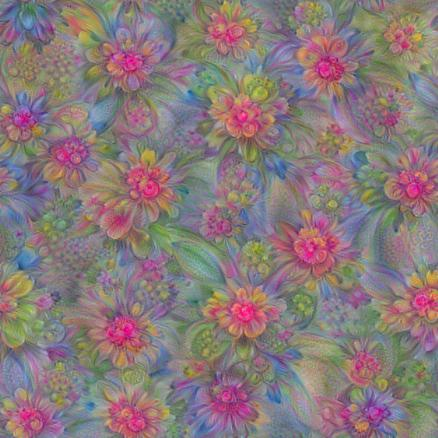

In [9]:
def render_lapnorm(t_obj, img0=img_noise, visfunc=visstd,
                   iter_n=10, step=1.0, octave_n=3, octave_scale=1.4, lap_n=4):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!
    # build the laplacian normalization graph
    lap_norm_func = tffunc(np.float32)(partial(lap_normalize, scale_n=lap_n))

    img = img0.copy()
    for octave in range(octave_n):
        if octave>0:
            hw = np.float32(img.shape[:2])*octave_scale
            img = resize(img, np.int32(hw))
        for i in range(iter_n):
            g = calc_grad_tiled(img, t_grad)
            g = lap_norm_func(g)
            img += g*step
            print('.', end = ' ')
        clear_output()
        showarray(visfunc(img))
        
render_lapnorm(T(layer)[:,:,:,channel])

## DeepDream

In [10]:
def render_deepdream(t_obj, img0=img_noise,
                     iter_n=10, step=1.5, octave_n=4, octave_scale=1.4):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!

    # split the image into a number of octaves
    img = img0
    octaves = []
    for i in range(octave_n-1):
        hw = img.shape[:2]
        lo = resize(img, np.int32(np.float32(hw)/octave_scale))
        hi = img-resize(lo, hw)
        img = lo
        octaves.append(hi)
    
    # generate details octave by octave
    for octave in range(octave_n):
        if octave>0:
            hi = octaves[-octave]
            img = resize(img, hi.shape[:2])+hi
        for i in range(iter_n):
            g = calc_grad_tiled(img, t_grad)
            img += g*(step / (np.abs(g).mean()+1e-7))
            print('.',end = ' ')
        clear_output()
        showarray(img/255.0)
    return img

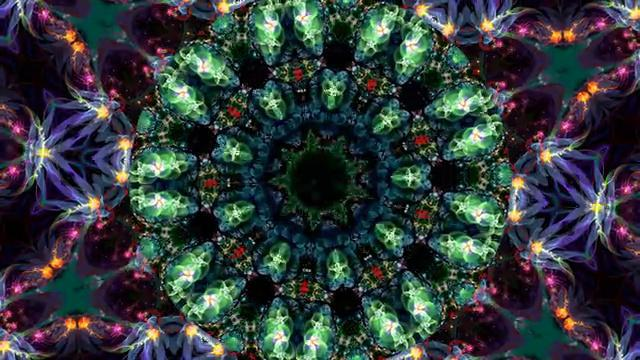

In [14]:
img = PIL.Image.open('zoomed_frames2/frame100.jpg')
img = np.float32(img)
showarray(img/255.0)

Used to determine effects of using DeepDream multiple times:

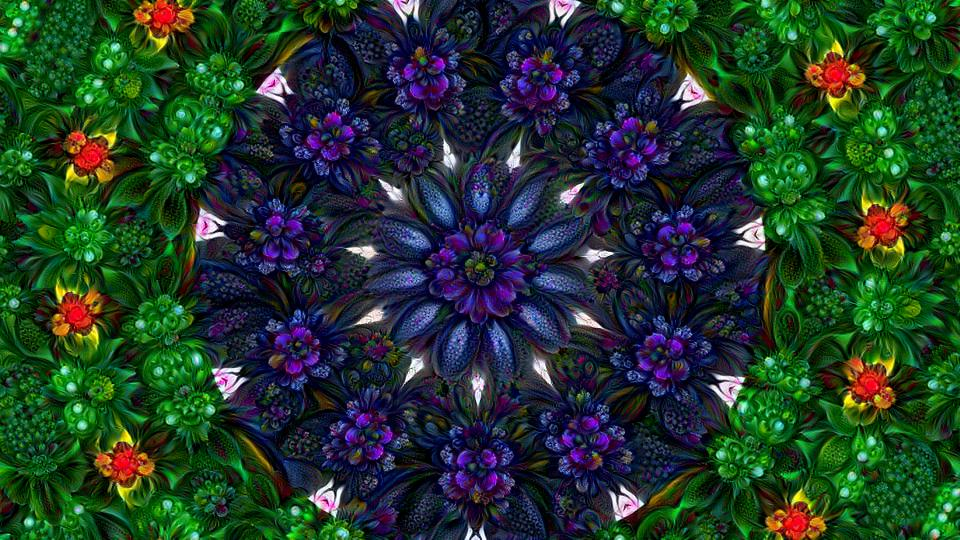

First


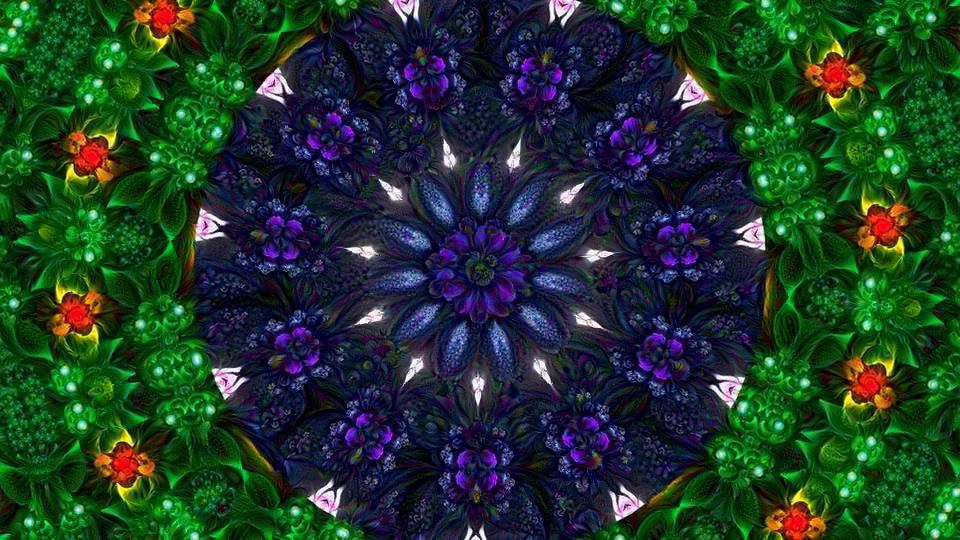

Second


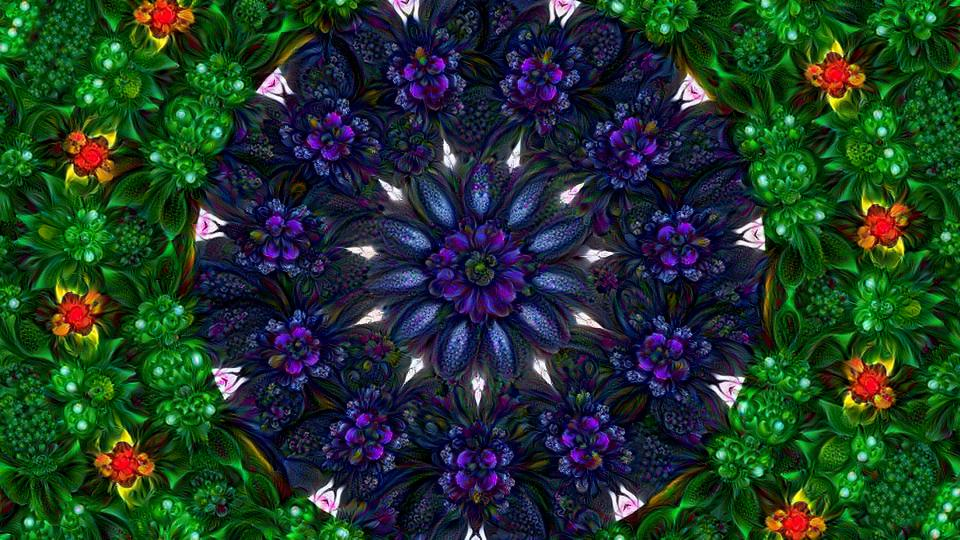

Third


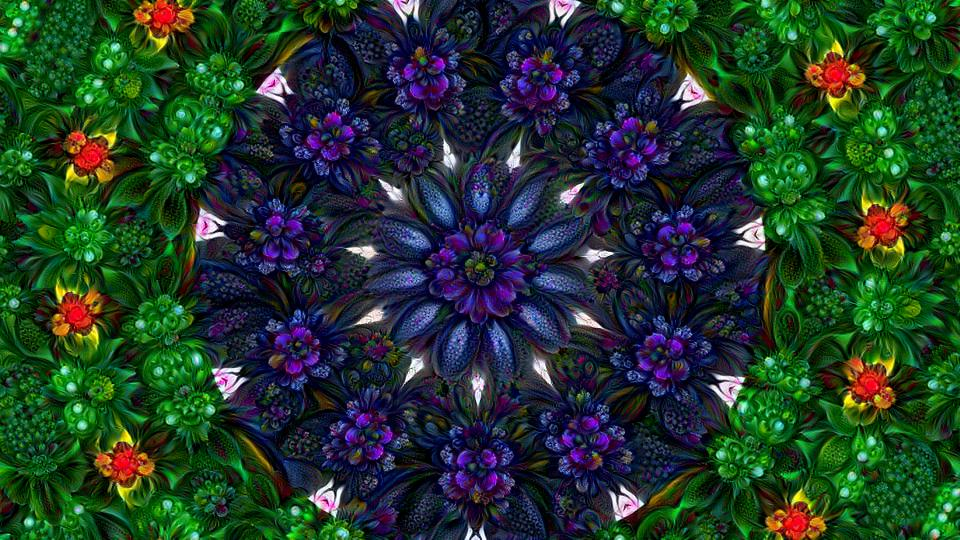

In [106]:
#frame1 = render_deepdream(T(layer)[:,:,:,139], img)
#frame2 = render_deepdream(T(layer)[:,:,:,139], frame1)
frame3 = render_deepdream(T(layer)[:,:,:,139], frame2)
print("First")
showarray(frame1/255.0)
print("Second")
showarray(frame2/255.0)
print("Third")
showarray(frame3/255.0)

## Animated DeepDream

In [118]:
!mkdir frames2

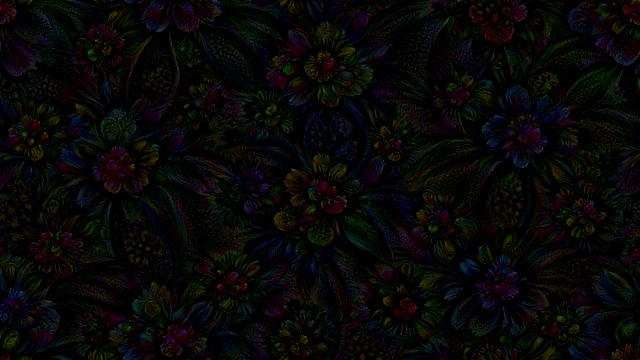

In [11]:
img = PIL.Image.open('frames/0412.jpg')
img = np.float32(img)
frame = img
frame_prev = frame
frame_i = 412
h, w = frame.shape[:2]
print(h)
print(w)
for i in range(450):
    print("Frame: ", i)
    #Load image
    frame = PIL.Image.open("zoomed_frames/frame%d.jpg"%frame_i)
    frame = np.float32(frame)
    if i == 0:
        frame_prev = frame
        
    frame = (.75*frame) + (.25*frame_prev)
    
    #DeepDream
    print(1, "\t", i)
    frame = render_deepdream(T(layer)[:,:,:,139], frame)
    print(2, "\t", i)
    frame = render_deepdream(T(layer)[:,:,:,139], frame)
    #Save frame
    PIL.Image.fromarray(np.uint8(np.clip(frame/255.0, 0, 1)*255)).save("frames/%04d.jpg"%frame_i)
    
    frame_i += 1
    frame_prev = frame

In [13]:
!ffmpeg -r 15 -i frames/%04d.jpg -s 640x360 deepdream_kaleidoscope15.mp4

ffmpeg version 3.4.4-0ubuntu0.18.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena